In [58]:
import csv

with open('enjoysport.csv', 'r') as csvfile:
    data = list(csv.reader(csvfile))

print(data)

print("\nThe total number of training instances are:", len(data))

num_attributes = len(data[0]) - 1
hypothesis = ['0'] * num_attributes
print("\nThe initial hypothesis is:", hypothesis)

for i, instance in enumerate(data):
    if instance[num_attributes] == 'yes':
        for j in range(num_attributes):
            if hypothesis[j] == '0' or hypothesis[j] == instance[j]:
                hypothesis[j] = instance[j]
            else:
                hypothesis[j] = '?'
    print(f"\nThe hypothesis after training instance {i + 1} is:", hypothesis)

print("\nThe Maximally specific hypothesis is:", hypothesis)

[['sky', 'airtemp', 'humidity', 'wind', 'water', 'forcast', 'enjoysport'], ['sunny', 'warm', 'normal', 'strong', 'warm', 'same', 'yes'], ['sunny', 'warm', 'high', 'strong', 'warm', 'same', 'yes'], ['rainy', 'cold', 'high', 'strong', 'warm', 'change', 'no'], ['sunny', 'warm', 'high', 'strong', 'cool', 'change', 'yes']]

The total number of training instances are: 5

The initial hypothesis is: ['0', '0', '0', '0', '0', '0']

The hypothesis after training instance 1 is: ['0', '0', '0', '0', '0', '0']

The hypothesis after training instance 2 is: ['sunny', 'warm', 'normal', 'strong', 'warm', 'same']

The hypothesis after training instance 3 is: ['sunny', 'warm', '?', 'strong', 'warm', 'same']

The hypothesis after training instance 4 is: ['sunny', 'warm', '?', 'strong', 'warm', 'same']

The hypothesis after training instance 5 is: ['sunny', 'warm', '?', 'strong', '?', '?']

The Maximally specific hypothesis is: ['sunny', 'warm', '?', 'strong', '?', '?']


In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
url = "iris.csv"
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df = pd.read_csv(url, header=None, names=column_names)

X = df.drop('class', axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}\n")
print(f"Classification Report:\n{report}")

Accuracy: 1.0

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [2]:

# 9
import pandas as pd
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination
data = pd.read_csv('heart.csv')

subset_data = data[['age', 'sex', 'cp', 'thalach', 'exang', 'oldpeak', 'target']]
print(subset_data.head())
model = BayesianNetwork([
    ('age', 'target'),
    ('sex', 'target'),
    ('cp', 'target'),
    ('thalach', 'target'),
    ('exang', 'target'),
    ('oldpeak', 'target')
])

model.fit(subset_data, estimator=MaximumLikelihoodEstimator)
inference = VariableElimination(model)

evidence = { 'age': 50, 'sex': 1, 'cp': 2, 'thalach': 163, 'exang': 0, 'oldpeak': 0 }

result = inference.query(variables=['target'], evidence=evidence)
print(result)

C:\Users\ADHITHYA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


   age  sex  cp  thalach  exang  oldpeak  target
0   52    1   0      168      0      1.0       0
1   53    1   0      155      1      3.1       0
2   70    1   0      125      1      2.6       0
3   61    1   0      161      0      0.0       0
4   62    0   0      106      0      1.9       0
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.0000 |
+-----------+---------------+
| target(1) |        1.0000 |
+-----------+---------------+


In [3]:

# 10
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}\n")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Accuracy: 1.0

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [21]:
# 8
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
newsgroups = fetch_20newsgroups(subset='all')
X, y = newsgroups.data, newsgroups.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.5)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

y_pred = nb_classifier.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=newsgroups.target_names)

print(f"Accuracy: {accuracy}\n")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.8787798408488063

Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.85      0.86      0.86       151
           comp.graphics       0.88      0.84      0.86       202
 comp.os.ms-windows.misc       0.87      0.84      0.86       195
comp.sys.ibm.pc.hardware       0.64      0.85      0.73       183
   comp.sys.mac.hardware       0.94      0.87      0.90       205
          comp.windows.x       0.95      0.85      0.90       215
            misc.forsale       0.93      0.72      0.81       193
               rec.autos       0.91      0.94      0.92       196
         rec.motorcycles       0.89      0.95      0.92       168
      rec.sport.baseball       0.95      0.95      0.95       211
        rec.sport.hockey       0.90      0.99      0.94       198
               sci.crypt       0.90      0.97      0.94       201
         sci.electronics       0.92      0.82      0.87       202
                 sci.m

In [23]:
# 7
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

# Create a small sample dataset
data = [
    "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
    "Nah I don't think he goes to usf, he lives around here though",
    "FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv",
    "Even my brother is not like to speak with me. They treat me like aids patent.",
    "WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.",
    "I HAVE A DATE ON SUNDAY WITH WILL!!",
    "Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030",
    "I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.",
    "SIX chances to win CASH! From 100 to 20,000 pounds txt> CASH to 86688 T's&C's apply www.cashco.com",
    "Nah I was in the gym. Thanks though! Will b over soon."
]

# Labels (0 for ham, 1 for spam)
labels = [1, 0, 1, 0, 1, 0, 1, 0, 1, 0]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train a Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train_tfidf, y_train)

# Predict the labels of the test set
y_pred = clf.predict(X_test_tfidf)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print the classification report
report = classification_report(y_test, y_pred)
print("Classification report:\n",report)

Accuracy: 1.0
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [56]:
# 6
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
data = load_iris()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=45)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
class_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', class_rep)

Accuracy: 0.93
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.78      1.00      0.88         7
           2       1.00      0.83      0.91        12

    accuracy                           0.93        30
   macro avg       0.93      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30



Accuracy: 1.0
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



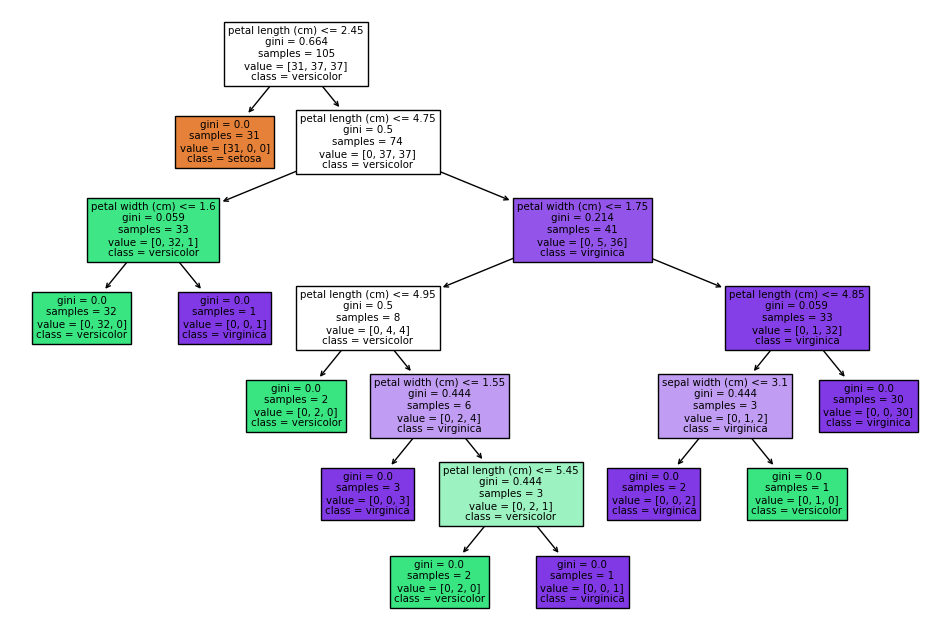

In [51]:
"""
5) Implement and demonstrate the working of decision tree algorithm
"""
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score,classification_report
import matplotlib.pyplot as plt
iris = load_iris()
X,y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
class_rep = classification_report(y_test, y_pred)
print('Accuracy:',accuracy)
print("Classification Report: \n",class_rep)

plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()

In [57]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}\n")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Accuracy: 1.0

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [14]:
# 2
import numpy as np
import pandas as pd

data = pd.read_csv('enjoysport.csv')
concepts = data.iloc[:, :-1].values
target = data.iloc[:, -1].values

def learn(concepts, target):
    specific_h = concepts[0].copy()
    general_h = [['?' for _ in range(len(specific_h))] for _ in range(len(specific_h))]

    for i, h in enumerate(concepts):
        if target[i] == "yes":
            for x in range(len(specific_h)):
                if h[x] != specific_h[x]:
                    specific_h[x] = '?'
                    general_h[x][x] = '?'
        else:
            for x in range(len(specific_h)):
                if h[x] != specific_h[x]:
                    general_h[x][x] = specific_h[x]
                else:
                    general_h[x][x] = '?'

    general_h = [h for h in general_h if h != ['?' for _ in range(len(specific_h))]]
    return specific_h, general_h

s_final, g_final = learn(concepts, target)
print("\nFinal Specific_h:", s_final)
print("\nFinal General_h:", g_final)


Final Specific_h: ['sunny' 'warm' '?' 'strong' '?' '?']

Final General_h: [['sunny', '?', '?', '?', '?', '?'], ['?', 'warm', '?', '?', '?', '?']]


In [20]:
# 3
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Step 1: Data Cleaning
data = pd.read_csv('housing.csv')
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)

imputer = SimpleImputer(strategy='mean')
data['longitude'] = imputer.fit_transform(data[['longitude']])

# Step 2: Data Integration (if necessary)
df_housing = pd.read_csv('housing.csv')
df_additional = pd.read_csv('new.csv')
merged_df = pd.merge(df_housing, df_additional, on='longitude', how='inner')
print('Merged datasets:\n', merged_df)

# Step 3: Data Transformation
categorical_cols = ['ocean_proximity']
data_transformed = pd.get_dummies(data, columns=categorical_cols, drop_first=True)  # Using pd.get_dummies for one-hot encoding
numerical_cols = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
scaler = StandardScaler()
data_transformed[numerical_cols] = scaler.fit_transform(data_transformed[numerical_cols])

# Save the processed data to a new CSV file
data_transformed.to_csv('processed_data.csv', index=False)
print("Transferred data\n",data_transformed)

Merged datasets:
     longitude  latitude_x  housing_median_age_x  total_rooms_x  \
0     -122.23       37.88                  41.0          880.0   
1     -122.23       37.84                  50.0         2515.0   
2     -122.23       37.84                  47.0         3175.0   
3     -122.23       37.85                  52.0         2800.0   
4     -122.23       37.80                  52.0         2033.0   
..        ...         ...                   ...            ...   
67    -122.23       40.20                  17.0          762.0   
68    -122.23       40.17                  21.0         1401.0   
69    -122.23       40.15                  14.0         2297.0   
70    -122.23       39.95                  21.0         2087.0   
71    -122.23       39.86                  21.0         1730.0   

    total_bedrooms_x  population_x  households_x  median_income_x  \
0              129.0         322.0         126.0           8.3252   
1              399.0         970.0         373.0   

Accuracy: 0.9
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      0.78      0.82         9
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



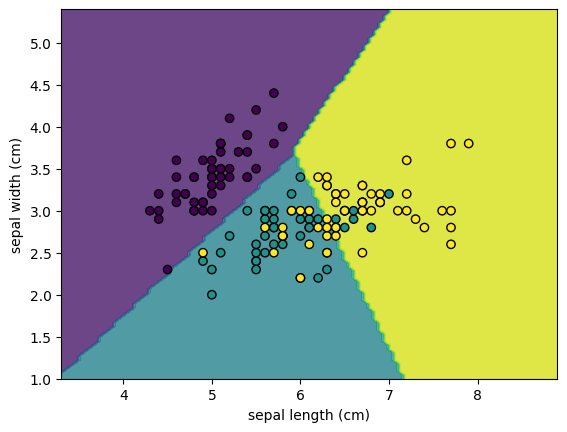

In [28]:

# 4
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
iris = load_iris()
X, y = iris.data[:, :2], iris.target

# svm = SVC(kernel='linear', gamma=0.5, C=1.0).fit(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
class_rep = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report: \n",class_rep)
DecisionBoundaryDisplay.from_estimator(svm, X,  alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()